# Smartphone Sales Analysis

<p>On this project, I try to analyze a smart phone sales dataset. In the end we should know which operating system and phone brand customers bought and rate the most, brands with the best features and affordable phones with good specifications.

<p>This dataset provides a comprehensive collection of information about all the latest smartphones available in the market as of the current time. The dataset was created by web scraping reputable online sources to gather accurate and up-to-date information about various smartphone models, their specifications, features, and pricing.

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [2]:
# Using Plotly Express
!pip install plotly --q

In [3]:
import plotly.express as px

In [4]:
# Importing dataset and viewing the table
df = pd.read_csv('smartphones.csv')
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,NaN,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,NaN,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [5]:
# Checking data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   avg_rating                 879 non-null    float64
 4   5G_or_not                  980 non-null    int64  
 5   processor_brand            960 non-null    object 
 6   num_cores                  974 non-null    float64
 7   processor_speed            938 non-null    float64
 8   battery_capacity           969 non-null    float64
 9   fast_charging_available    980 non-null    int64  
 10  fast_charging              769 non-null    float64
 11  ram_capacity               980 non-null    int64  
 12  internal_memory            980 non-null    int64  
 13  screen_size                980 non-null    float64

In [6]:
# Rows and columns using print and shape functions
print("The Dataset contains:")
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

The Dataset contains:
Rows: 980
Columns: 22


In [7]:
# Data understanding
df.describe()

,price,avg_rating,5G_or_not,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,num_rear_cameras,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
count,980.000000,879.000000,980.000000,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980.000000,980.000000,975.000000,980.000000,980.000000,980.000000
mean,32520.504082,7.825825,0.560204,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,2.814286,50.319286,16.589744,0.630612,2214.663265,1075.852041
std,39531.812669,0.740285,0.496616,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,0.776441,33.000968,10.876944,0.482885,516.484254,290.164931
min,3499.000000,6.000000,0.000000,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,1.000000,2.000000,0.000000,0.000000,480.000000,480.000000
25%,12999.000000,7.400000,0.000000,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,2.000000,24.000000,8.000000,0.000000,1612.000000,1080.000000
50%,19994.500000,8.000000,1.000000,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,3.000000,50.000000,16.000000,1.000000,2400.000000,1080.000000
75%,35491.500000,8.400000,1.000000,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,3.000000,64.000000,16.000000,1.000000,2408.000000,1080.000000
max,650000.000000,8.900000,1.000000,8.000000,3.220000,22000.000000,1.000000,240.000000,18.000000,1024.000000,8.030000,240.000000,4.000000,200.000000,60.000000,1.000000,3840.000000,2460.000000


In [8]:
# Checking the table tail
df.tail()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.3,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.3,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.3,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.2,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080
979,zte,ZTE Axon 40 Ultra 5G,61990,8.9,1,snapdragon,8.0,3.0,5000.0,1,...,128,6.80,120,3,android,64.0,16.0,0,2480,1116


In [9]:
# Checking for null values
df.isnull().sum()

brand_name                     0
model                          0
price                          0
avg_rating                   101
5G_or_not                      0
processor_brand               20
num_cores                      6
processor_speed               42
battery_capacity              11
fast_charging_available        0
fast_charging                211
ram_capacity                   0
internal_memory                0
screen_size                    0
refresh_rate                   0
num_rear_cameras               0
os                            14
primary_camera_rear            0
primary_camera_front           5
extended_memory_available      0
resolution_height              0
resolution_width               0
dtype: int64

<p>After checking for data information I found out some values were missing in the dataset.

In [10]:
# filling empty cells
df = df.ffill(axis= 0)

In [11]:
df.head()

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.5,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,3500.0,0,...,64,6.1,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,3500.0,0,...,128,6.1,60,2,ios,12.0,12.0,0,2532,1170


In [12]:
df.isnull().sum()

brand_name                   0
model                        0
price                        0
avg_rating                   0
5G_or_not                    0
processor_brand              0
num_cores                    0
processor_speed              0
battery_capacity             0
fast_charging_available      0
fast_charging                2
ram_capacity                 0
internal_memory              0
screen_size                  0
refresh_rate                 0
num_rear_cameras             0
os                           0
primary_camera_rear          0
primary_camera_front         0
extended_memory_available    0
resolution_height            0
resolution_width             0
dtype: int64

<p>What I did here was to interpolate the empty cells with average values from above and below table cells. As we can see, we have been able to handle the missing values.

In [13]:
df.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

<p> Let's do some findings in this dataset.

In [14]:
def plotfunction(plt, title, xlabel, ylabel):
# plot of a histogram duration distribution
    avg_rating = 10**np.arange(0,3+0.15,0.1)
    processor_speed = [1,3,10,30,100,300,1000]
    plt.hist(df['processor_speed'])
    plt.title('Brand Name Rating Function')
    plt.xlabel('Avg Rating')
    plt.ylabel('Processor Speed')
#     plt.xscale('log')
#     plt.xticks(ticks,ticks)
# plt.show()

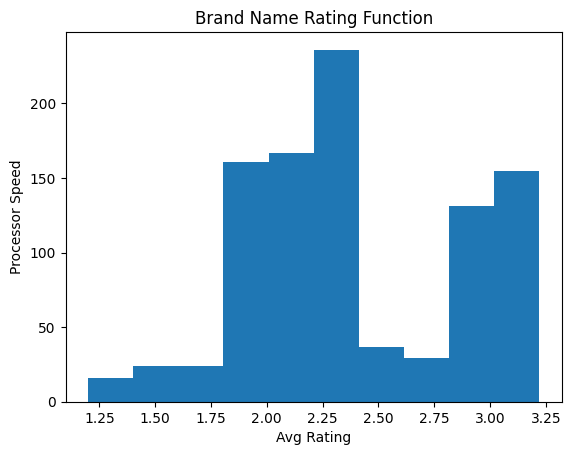

In [15]:
plotfunction(plt, 'Brand Name', 'avg_rating', 'processor_speed')

## Total Sales

In [16]:
total_sales = df['price'].sum()
print('The total sales is:', total_sales)

The total sales is: 31870094


## Most popular brand name

<p> We want to know the brand people bought the most.

In [17]:
# Checking for value counts for column
df.brand_name.value_counts()

xiaomi       134
samsung      132
vivo         111
realme        97
oppo          88
motorola      52
apple         46
oneplus       42
poco          41
tecno         33
iqoo          32
infinix       29
huawei        16
google        14
honor         13
nokia         13
itel          10
sony           9
asus           7
nubia          6
nothing        5
lava           4
jio            4
redmi          3
gionee         3
letv           3
lg             3
micromax       3
oukitel        3
ikall          3
royole         2
lyf            2
lenovo         2
doogee         2
zte            2
leitz          1
leeco          1
duoqin         1
sharp          1
cola           1
tcl            1
cat            1
tesla          1
vertu          1
blu            1
blackview      1
Name: brand_name, dtype: int64

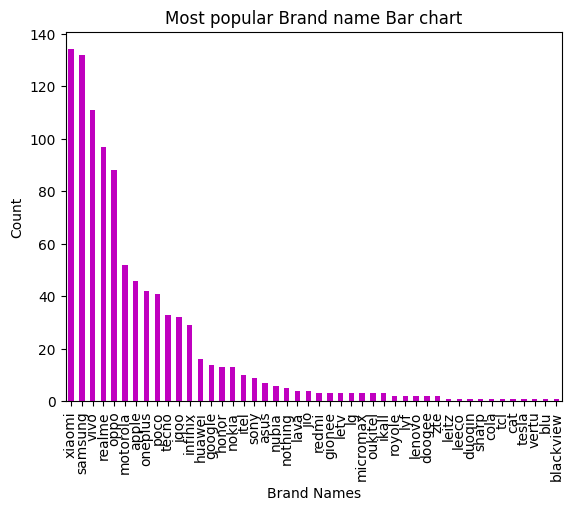

In [18]:
# Ploting the most popular brand name
ax = df['brand_name'].value_counts()\
    .head(47)\
    .plot(kind = 'bar',title = 'Most popular Brand name Bar chart', color='m')
ax.set_ylabel('Count')
ax.set_xlabel('Brand Names')
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
plt.rcParams['figure.figsize'] = (15, 3)
plt.savefig('most popular bar chart.jpg')
plt.show()

<p> The Xiaomi brand seem to be the most popular and most sold device.

### Most popular Operating system
<p>Ploting most popular brand names and their OS that uses 5G network, 1 = Yes 0 = No with plotly express.

In [34]:
fig = px.scatter(df, x='brand_name', y='os', color='5G_or_not', title='Most Popular Brand and OS with 5G or not')
fig.show()

### Brand names with high customer rating

In [20]:
fig = px.histogram(df, x='brand_name', y='avg_rating', color='os', title='Brand name Rating', width=1000, height=400)
fig.show()

In [21]:
def brand_func():
    brand = df['brand_name']
    rating = df['avg_rating']
    
    plt.figure(figsize = (13, 5))
    plt.title('Brand names with high rating', fontsize=20)

    ax = sns.barplot(x=brand, y=rating)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=15, ha='right')
    plt.savefig('brand names with higher rating')
    plt.tight_layout()
plt.show()

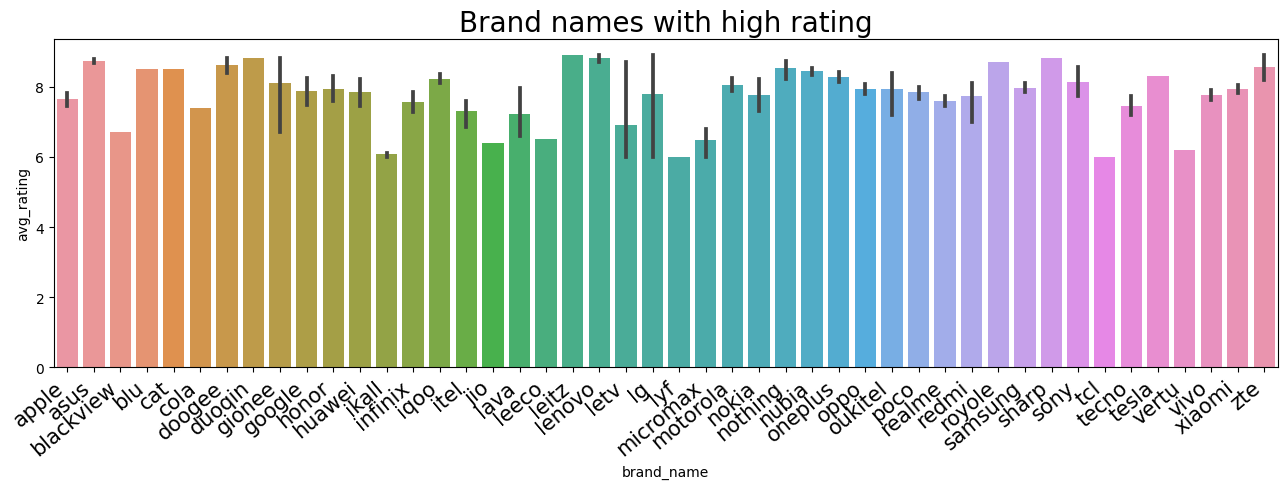

In [22]:
brand_func()

In [23]:
df.columns

Index(['brand_name', 'model', 'price', 'avg_rating', '5G_or_not',
       'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity',
       'fast_charging_available', 'fast_charging', 'ram_capacity',
       'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras',
       'os', 'primary_camera_rear', 'primary_camera_front',
       'extended_memory_available', 'resolution_height', 'resolution_width'],
      dtype='object')

### Processor brand with the highest speed

In [24]:
df.processor_brand.value_counts()

snapdragon    419
helio         206
dimensity     177
exynos         57
bionic         45
unisoc         28
tiger          24
google          9
kirin           7
spreadtrum      4
sc9863a         2
fusion          1
mediatek        1
Name: processor_brand, dtype: int64

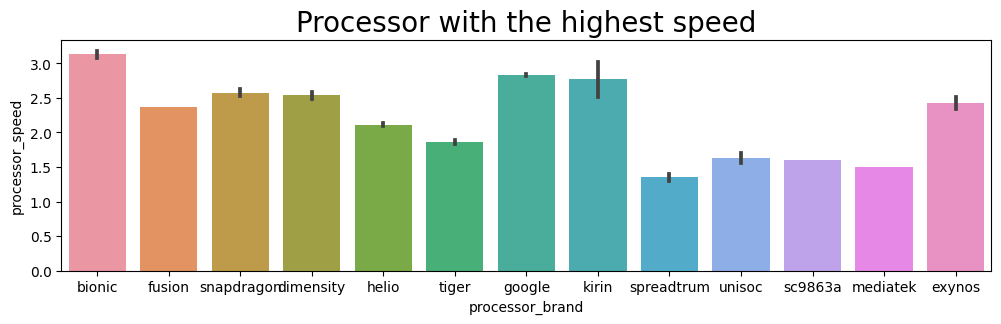

In [25]:
# Plot using bar plot

processor = df['processor_brand']
speed = df['processor_speed']

plt.rcParams['figure.figsize'] = (12, 3)
plt.title('Processor with the highest speed', fontsize=20)

sns.barplot(x=processor, y=speed)
plt.savefig('Highest processor speed.jpg')
plt.show()

### Phone brand with expensive price

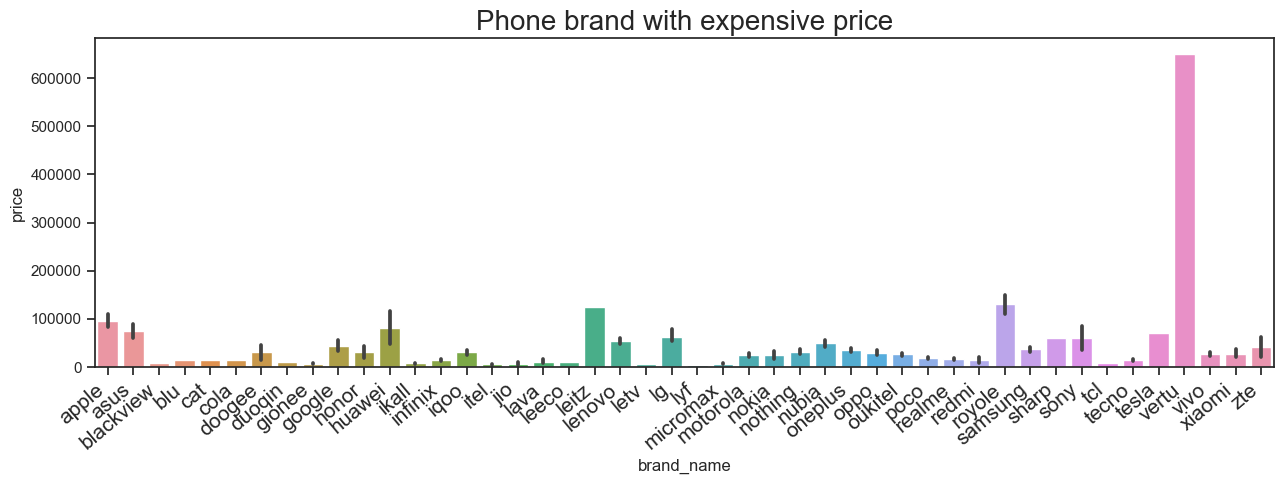

In [35]:
brand = df['brand_name']
price = df['price']

plt.figure(figsize = (13, 5))
plt.title('Phone brand with expensive price', fontsize=20)

ax = sns.barplot(x=brand, y=price)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, fontsize=15, ha='right')
plt.tight_layout()
plt.savefig('Expensive brands.jpg')
plt.show()

### Analyzing with SQL

In [27]:
# Importing SQL
import sqlite3

# Connecting to a Database
conn = sqlite3.connect(':memory:')

In [28]:
# Connection Object
c = conn.cursor()

#### Converting DataFrame to SQL

In [29]:
df.to_sql('df', conn, if_exists='replace', index=False)

980

In [30]:
pd.read_sql('SELECT * FROM df', conn)

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,apple,Apple iPhone 11,38999,7.3,0,bionic,6.0,2.65,3110.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,1792,828
1,apple,Apple iPhone 11 (128GB),46999,7.5,0,bionic,6.0,2.65,3110.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,1792,828
2,apple,Apple iPhone 11 Pro Max,109900,7.7,0,bionic,6.0,2.65,3500.0,1,...,64,6.50,60,3,ios,12.0,12.0,0,2688,1242
3,apple,Apple iPhone 12,51999,7.4,1,bionic,6.0,3.10,3500.0,0,...,64,6.10,60,2,ios,12.0,12.0,0,2532,1170
4,apple,Apple iPhone 12 (128GB),55999,7.5,1,bionic,6.0,3.10,3500.0,0,...,128,6.10,60,2,ios,12.0,12.0,0,2532,1170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,xiaomi,Xiaomi Redmi Note 9 Pro,13999,7.5,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,48.0,16.0,1,2400,1080
976,xiaomi,Xiaomi Redmi Note 9 Pro (4GB RAM + 128GB),14439,7.7,0,snapdragon,8.0,2.30,5020.0,1,...,128,6.67,60,4,android,48.0,16.0,1,2400,1080
977,xiaomi,Xiaomi Redmi Note 9 Pro Max,16490,8.0,0,snapdragon,8.0,2.30,5020.0,1,...,64,6.67,60,4,android,64.0,32.0,1,2400,1080
978,zte,ZTE Axon 30S,19999,8.2,1,snapdragon,8.0,3.20,4200.0,1,...,128,6.90,120,4,android,50.0,16.0,1,2460,1080


#### Brand names that uses snapdragon processor

In [31]:
brand = pd.read_sql("""
    SELECT brand_name FROM df WHERE processor_brand = 'snapdragon'
    GROUP BY brand_name
    """, conn)

brand

,brand_name
0,asus
1,cat
2,google
3,honor
4,huawei
5,ikall
6,iqoo
7,jio
8,leitz
9,lenovo


### Cheap phones with good specifications

In [32]:
brand_price = pd.read_sql("""
    SELECT * FROM df WHERE price <= 10000 AND processor_speed > 2.0
    """, conn)

brand_price

,brand_name,model,price,avg_rating,5G_or_not,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,...,internal_memory,screen_size,refresh_rate,num_rear_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,resolution_height,resolution_width
0,blackview,Blackview BV5200 Pro,8990,6.7,1,helio,8.0,2.3,5180.0,1,...,64,6.10,60,2,android,13.0,8.0,1,1560,720
1,honor,Honor Play 30,9999,6.8,1,snapdragon,8.0,2.2,5000.0,0,...,128,6.50,60,1,android,13.0,5.0,1,1600,720
2,infinix,Infinix Hot 12,9999,7.2,0,helio,8.0,2.3,6000.0,1,...,64,6.82,90,3,android,50.0,8.0,1,1640,720
3,infinix,Infinix Hot 20 Play,8999,6.7,0,helio,8.0,2.3,6000.0,1,...,64,6.82,90,2,android,13.0,8.0,1,1640,720
4,lava,Lava Blaze NXT,8999,6.6,0,helio,8.0,2.3,5000.0,0,...,64,6.50,60,3,android,13.0,8.0,1,1600,720
5,motorola,Motorola Moto E22s,9022,7.0,0,helio,8.0,2.3,5000.0,1,...,64,6.50,90,2,android,16.0,8.0,1,1600,720
6,motorola,Motorola Moto E32,8999,7.1,0,helio,8.0,2.3,5000.0,1,...,64,6.50,90,2,android,50.0,8.0,1,1600,720
7,motorola,Motorola Moto G22,9499,7.5,0,helio,8.0,2.3,5000.0,1,...,64,6.53,90,4,android,50.0,16.0,1,1600,720
8,oppo,OPPO A15,9999,6.6,0,helio,8.0,2.3,4230.0,0,...,32,6.52,60,3,android,13.0,5.0,1,1600,720
9,oppo,OPPO A17K,9499,6.2,0,helio,8.0,2.3,5000.0,0,...,64,6.56,60,1,android,8.0,5.0,1,1612,720


### Ploting affordable phone price with good specifications

<Axes: xlabel='Count', ylabel='brand_name'>

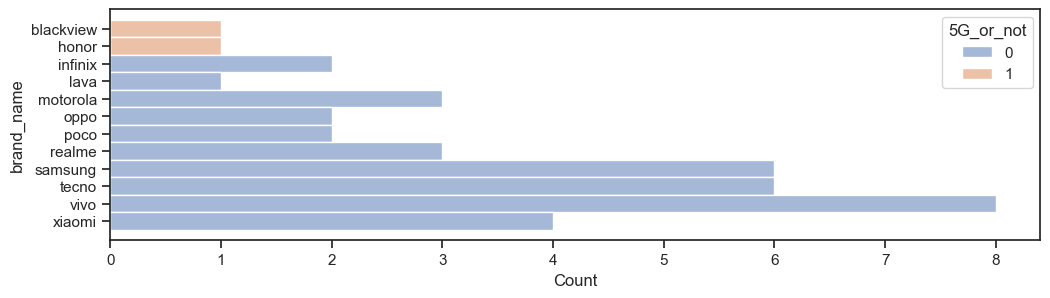

In [33]:
sns.set_theme(style='ticks')

sns.histplot(
    brand_price, 
    y= 'brand_name', 
    hue= '5G_or_not'
)

<p> After my analysis, here are my findings from the phone sales data. The top 5 sold and most popular phone brands are using the Andriod OS. The snapdragon processor appears to be the most used processor, but the bionic processor happens to be the fastest processor but only built for Apple Iphones brand.
<p> Using SQL to analyze the dataset I was able to find a list of phone brands people bought the most. And was also able to add a feature that display cheaper phone brand names and models with good specifications.